In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import statsmodels.formula.api as smf

In [7]:
#importing Database
df=pd.read_csv("delivery_time.csv")

In [8]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
# EDA & Data visualizationm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-12-33e9a8ef82a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

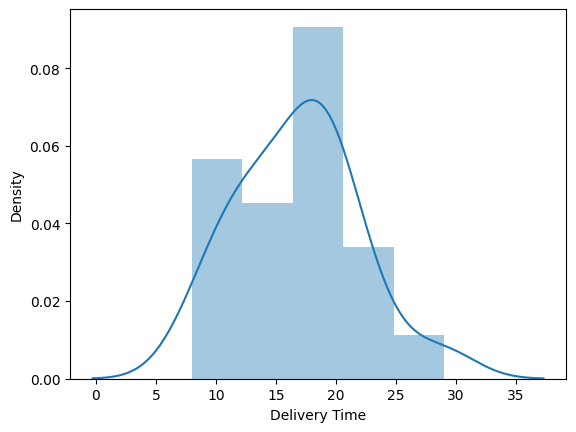

In [12]:
sns.distplot(df["Delivery Time"])

<ipython-input-13-2d125c5c60cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

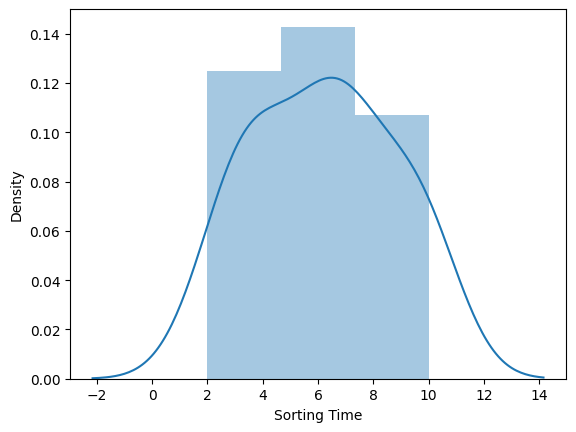

In [13]:
sns.distplot(df["Sorting Time"])

In [14]:
#Feature Engineering - Renaming The columns
df=df.rename({"Delivery Time":"delivery_time", "Sorting Time":"sorting_time"}, axis=1)

In [15]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
#correlation Analysis for the dataset
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

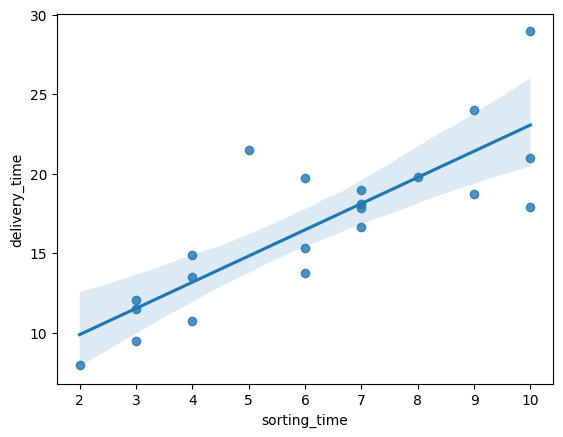

In [17]:
sns.regplot(x=df["sorting_time"], y=df["delivery_time"])

In [19]:
#Building the model
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [23]:
# Testing The Model and finding the coefficent parameter
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [24]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [25]:
#To finding the Rsquared values
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [28]:
#Model pridiction
# Manual prediction for say sorting time 6
delivery_time = (5.277634) + (1.903420)*(6)
delivery_time

16.698154

In [29]:
# Automatic Prediction for say sorting time 6, 9
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [30]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [31]:
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64